# Imports

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import os
import scipy.misc as sm
from scipy.ndimage import gaussian_filter
from scipy import ndimage

# Image Processing

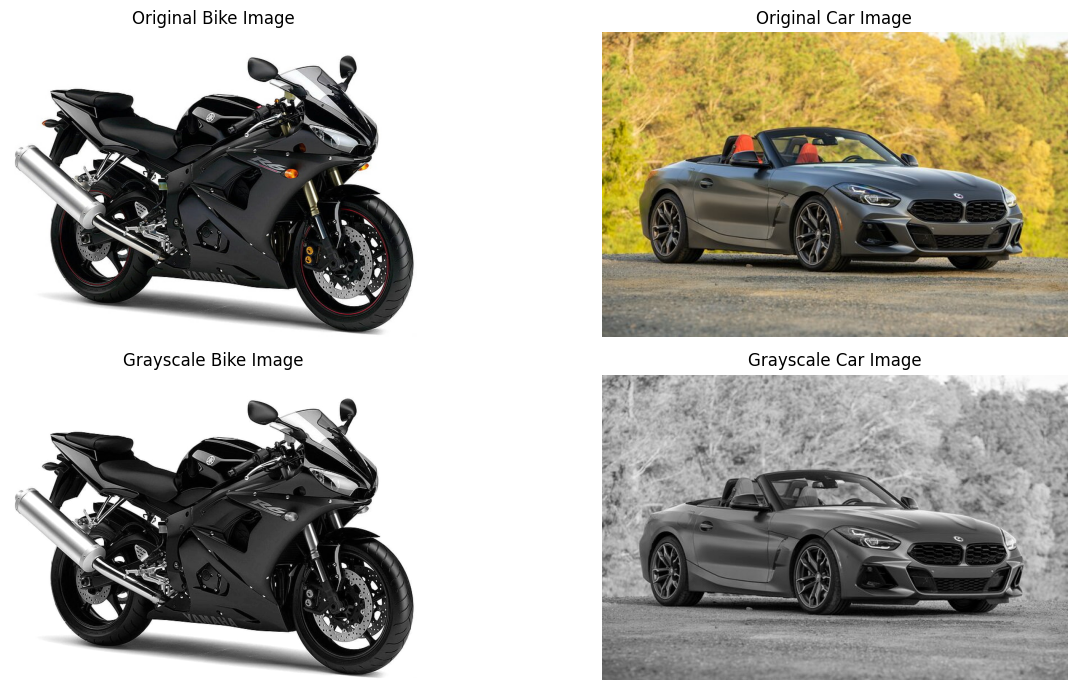

In [ ]:
def rgb2gray(rgb):
    '''
    Converting RGB image into gray scale image:
    rgb is a 3D numpy array representing an image.
    r = rgb[:,:,0]: This extracts the red channel (1st layer of 3D array).
    g = rgb[:,:,1]: This extracts the green channel (2nd layer of 3D array).
    b = rgb[:,:,2]: This extracts the blue channel (3rd layer of 3D array).
    '''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #This formula is a standard grayscale conversion formula of RGB image to grayscale. weights (0.2989, 0.5870, and 0.1140) are based on human perception,
    #as the human eye is more sensitive to green light than red and blue, so the green channel has the highest weight.
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

img_bike = mpimg.imread('/content/drive/MyDrive/CannyEdgeDetection/bike.jpg')
img_car = mpimg.imread('/content/drive/MyDrive/CannyEdgeDetection/car.jpg')
#convertig rgb to grayscale
gray_bike = rgb2gray(img_bike)
gray_car = rgb2gray(img_car)
#to display images side by side
plt.figure(figsize=(14, 7))

#displaying original RGB image
plt.subplot(2, 2, 1)  #(2 rows,2 columns,1st plot)
plt.imshow(img_bike)
plt.title("Original Bike Image")
plt.axis('off')

plt.subplot(2, 2, 2)  #(2 rows,2 columns,2nd plot)
plt.imshow(img_car)
plt.title("Original Car Image")
plt.axis('off')

#displaying grayscale image
plt.subplot(2, 2, 3)  #(2 rows,2 columns,3rd  plot)
plt.imshow(gray_bike, cmap='gray')
plt.title("Grayscale Bike Image")
plt.axis('off')

plt.subplot(2, 2, 4)  #(2 rows,2 columns,4th plot)
plt.imshow(gray_car, cmap='gray')
plt.title("Grayscale Car Image")
plt.axis('off')
#adjust layout to prevent overlap
plt.tight_layout()
#showing images
plt.show()

In [ ]:
def load_data(dir_name = '/content/drive/MyDrive/CannyEdgeDetection'):
    '''
    Loading image from "CannyEdgeDetection" directory
    Image is in jpg format which is now converted here into gray scale image
    '''
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = mpimg.imread(dir_name + '/' + filename) #loading image
            img = rgb2gray(img) #converting loaded image to gratscale
            imgs.append(img)  #appending grayscale image to the list
    return imgs
#loading grayscale image as numpy array
imgs = load_data()
imgs

[array([[254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
        [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
        [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
        ...,
        [254.9745, 254.9745, 254.9745, ..., 253.9746, 253.9746, 253.9746],
        [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
        [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745]]),
 array([[144.013 , 153.898 , 167.9783, ..., 249.2632, 249.2632, 249.2632],
        [150.6533, 164.011 , 178.2654, ..., 249.2632, 249.2632, 249.2632],
        [167.1678, 177.6506, 186.8947, ..., 249.0352, 249.0352, 249.0352],
        ...,
        [ 99.0071,  99.0071, 100.007 , ..., 143.254 , 140.7381, 137.7384],
        [102.0068, 100.007 ,  99.0071, ..., 142.2541, 142.7379, 141.738 ],
        [108.0062, 106.0064, 103.0067, ..., 141.2542, 144.7377, 145.7376]])]

In [ ]:
#this function is more useful in case of multiple images
def visualize(imgs, format=None, gray=False):
    '''
    Visualizes list of images in a grid format.
    Parameters:
    imgs (list): List of images to be displayed. Each image should be a numPy array. format and gray are optional.
    '''
    plt.figure(figsize=(20, 30))
    for i, img in enumerate(imgs):
        #checking the image have 3 channels or not (3, height, width) format
        if img.shape[0] == 3:
            img = img.transpose(1,2,0) #transpose image to (heigt, width, 3) format to display correctly as RGB standard format
        plt_idx = i+1  #determinig subplot index
        plt.subplot(2, 2, plt_idx)  #creating subplot for the image
        plt.imshow(img, cmap=format)
    plt.show()

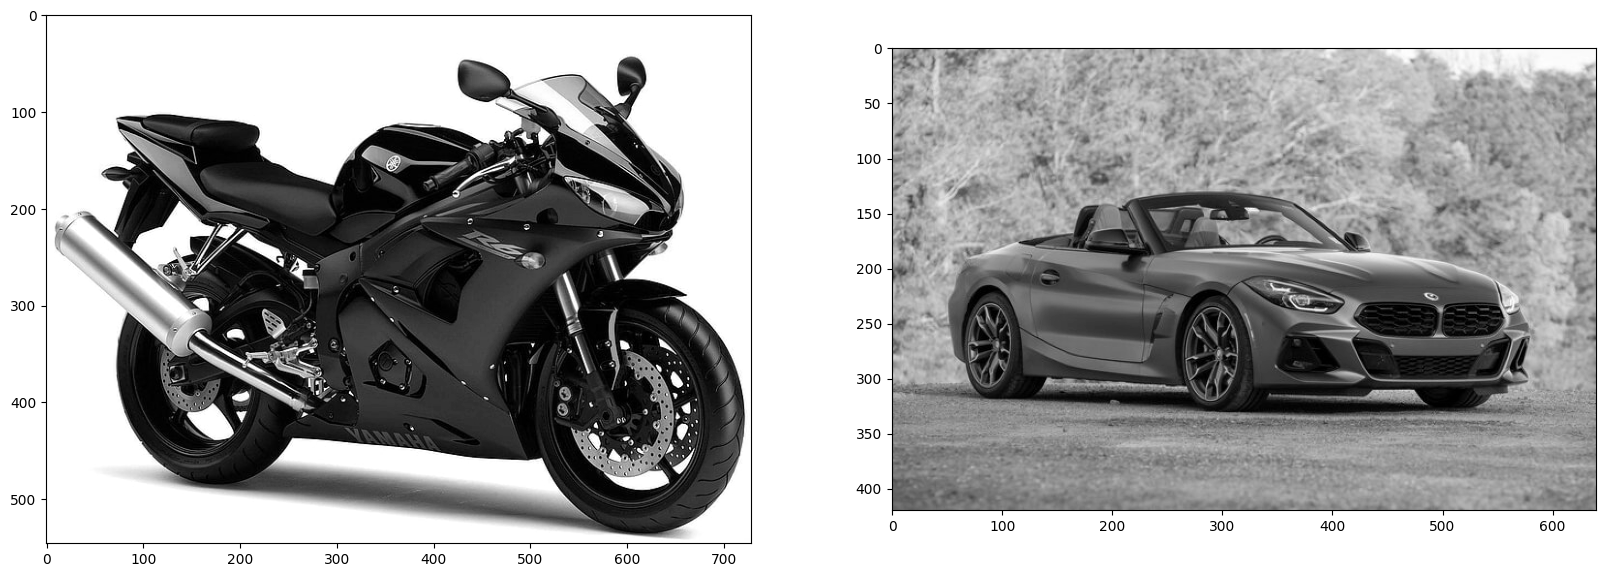

In [ ]:
#loaded image is visualized as grayscale
imgs = load_data()
visualize(imgs, 'gray', gray=True)

# 1. Removing Noise
The results of Edge Detection are highly sensitive to Image Noise so, applying Gaussian blur to smooth images. For this, the technique of image convolution is applied with a Gaussian kernel here of size (5*5). The small kernel results in less visiabilty of blur so here I use 5 by 5 Gaussian Kernel.

In [ ]:
def kernel(size, sigma=1):
  #checking size is an integer and calculate the half-size or radius of kernel
  size = int(size)//2
  #generating coordinate grid for 2D space (1st parameter specifies range of x and 2nd parameter specifies range of y coordinate)
  #-size and size for both x and y axes and +1 ensures that upper boundary of grid is also included
  x, y = np.mgrid[-size:size+1, -size:size+1]
  #normalization factor for Gaussian function calculation
  normal = 1 / (2.0 * np.pi * sigma**2)
  #computing Gaussian function values for each coordinate in the grid
  z =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  return z

Gaussian Blur effect on original images

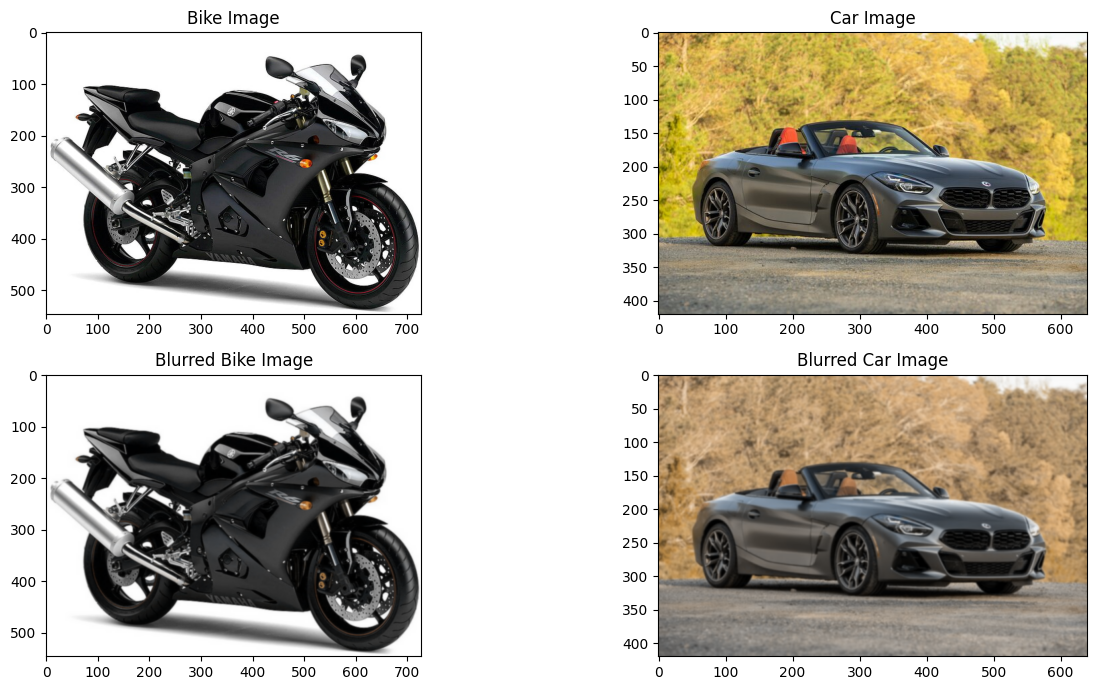

In [ ]:
#generating Gaussian kernel
gaussian_kernel = kernel(size=5, sigma=1)
'''small sigma produces sharp kernel with narrow bell curve and the blurring effect is minimal and details remain
sharp and preserved better. large sigma produces wide kernel with broader bell curve and produces more blurring effect
, as the kernel averages over a larger area of pixels and produces strong blur effect which can smooth out the image
significantly and may reduce details.'''
#applying Gaussian blur using scipy's gaussian_filter
blur_bike = gaussian_filter(img_bike, sigma=1)
blur_car = gaussian_filter(img_car, sigma=1)
plt.figure(figsize=(14, 7))

#original bike image
plt.subplot(2, 2, 1)
plt.imshow(img_bike)
plt.title("Bike Image")
#original car image
plt.subplot(2, 2, 2)
plt.imshow(img_car)
plt.title("Car Image")

#blurred bike image
plt.subplot(2, 2, 3)
plt.imshow(blur_bike)
plt.title("Blurred Bike Image")
#blurred car image
plt.subplot(2, 2, 4)
plt.imshow(blur_car)
plt.title("Blurred Car Image")

plt.tight_layout()
plt.show()

# a) Generate fx, fy, gradient magnitude, gradient direction images or Gradient Calculation.

- Gradient Calculation step is helpful to detect edge intensity & direction by calculating the gradient of image.
- The change of pixel's intensity is corresponded by edges which is detected by applying x(horizontal) and y(vertical) filters of both directions.
- Firstly, after smoothing the image derivates of x and y should be calculated and then convolved with Sobel kernel in both x and y directions .
- Then, Calculate gradient magnitude by formula: |gm| = underroot (fx square + fy sqaure)
- Then, Calculate gradient direction by formula: theta(x,y) = arctan or tan inverse(fy/fx)

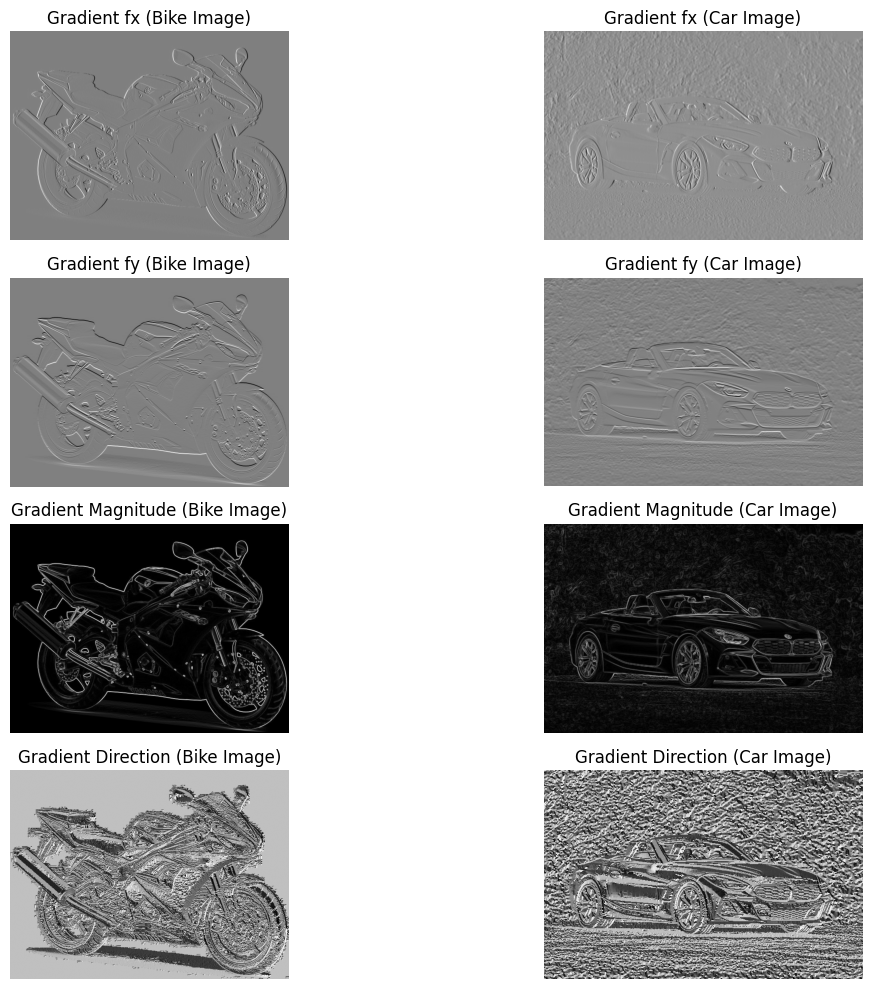

In [ ]:
def sobel(img):
    #computing gradients along x and y axis using sobel filters with numpy
    fx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    fy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
    #convolving image with sobel filters
    Ix = ndimage.convolve(img, fx)
    Iy = ndimage.convolve(img, fy)
    #computing gradient magnitude
    '''hypot computes the Euclidean norm (or the magnitude of the gradient). It effectively computes the
    square root of the sum of squares of its arguments.'''
    gm = np.hypot(Ix, Iy)
    gm = gm / gm.max() * 255  #normalize to range [0, 255]
    #computing gradient direction
    theta = np.arctan2(Iy, Ix)
    return Ix, Iy, gm, theta

#after sobel filter results for both images
plt.figure(figsize=(14, 10))  #figure size

for i, gray_img in enumerate(imgs):
    fx, fy, grad_mag, grad_dir = sobel(gray_img)
    #Bike image in the 1st column
    if i == 0:
        col = 1
        img_title = 'Bike Image'
    #Car image in the 2nd column
    elif i == 1:
        col = 2
        img_title = 'Car Image'

    #fx
    plt.subplot(4, 2, col)
    plt.imshow(fx, cmap='gray')
    plt.title(f'Gradient fx ({img_title})')
    plt.axis('off')
    #fy
    plt.subplot(4, 2, col + 2)
    plt.imshow(fy, cmap='gray')
    plt.title(f'Gradient fy ({img_title})')
    plt.axis('off')
    #gradient magnitude
    plt.subplot(4, 2, col + 4)
    plt.imshow(grad_mag, cmap='gray')
    plt.title(f'Gradient Magnitude ({img_title})')
    plt.axis('off')
    #gradient direction
    plt.subplot(4, 2, col + 6)
    plt.imshow(grad_dir, cmap='gray')
    plt.title(f'Gradient Direction ({img_title})')
    plt.axis('off')
#adjusting spacing between columns
plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.show()

# b) Write functions for non-maximum suppression and for hysteresis thresholding as used in Canny Edge detector.
## Non-Maximum Suppression

- The results after perfoming Gradient Calculation step shows that some edges are thick & some are thin. So, non-max suppression helps here to balance the thick edges.
- The result should get the image as thin edged image, so here is the need to do non-max suppression.

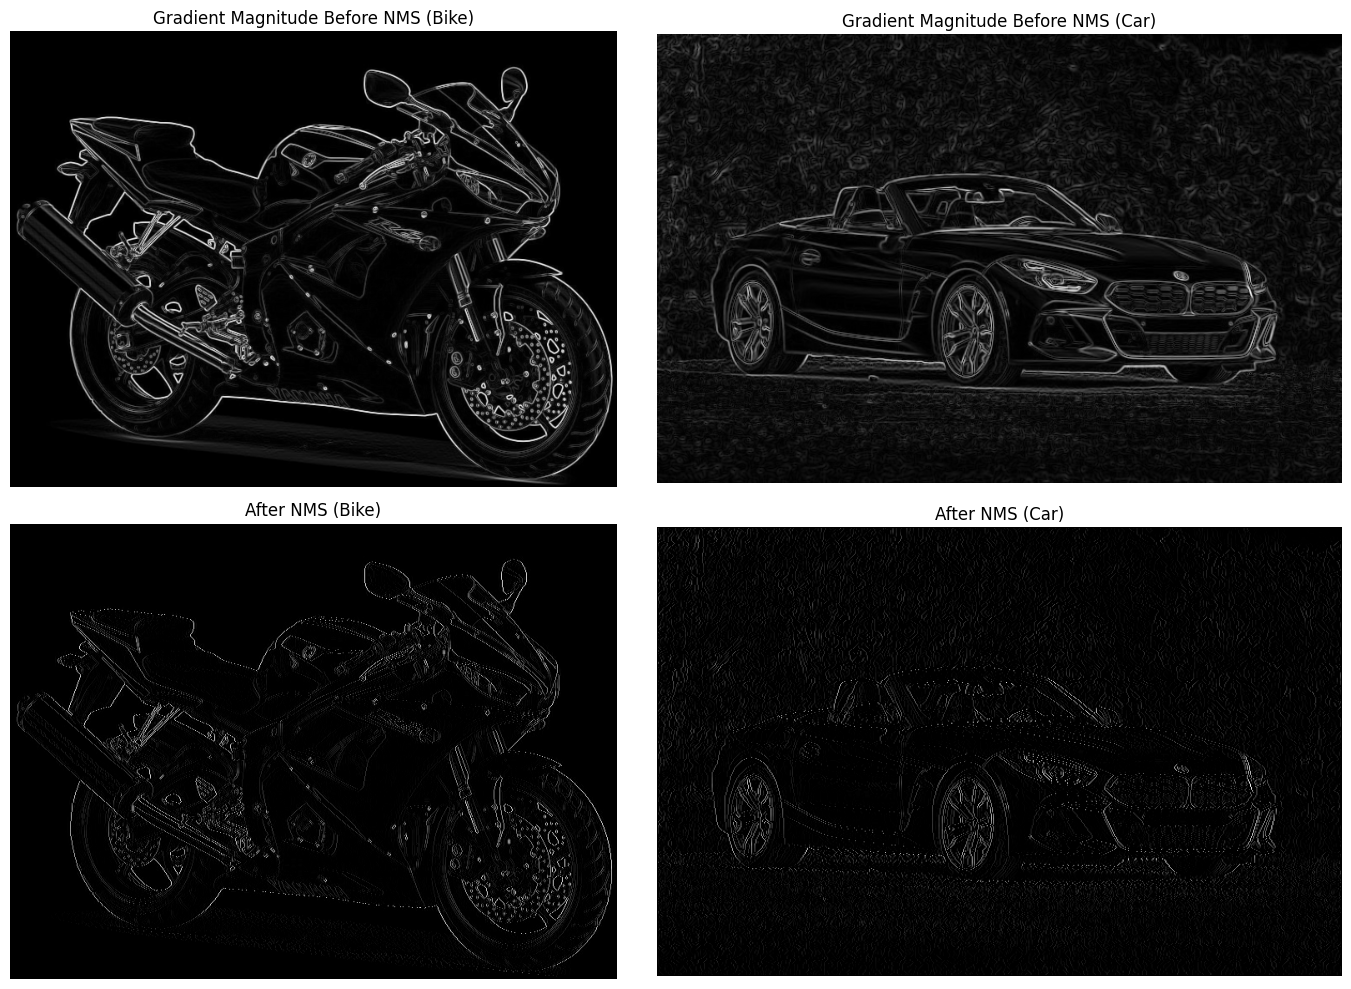

In [ ]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    M, N = gradient_magnitude.shape   #setting dimensions of the gradient magnitude image
    output = np.zeros((M, N), dtype=np.float32)  #initializing an empty output array of the same shape
    angle = gradient_direction % 180  #normalizing direction to [0, 180] degrees

    for i in range(1, M-1):  #iterating through each pixel except the boundary
        for j in range(1, N-1):
            q = 255   #initializing q to a high value (dummy comparison value)
            r = 255   #initializing r to a high value (dummy comparison value)

            #checking gradient direction and compaing the pixel with its neighbors
            #angle 0
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]   #right neighbor
                r = gradient_magnitude[i, j - 1]   #left neighbor
            #angle 45
            elif (22.5 <= angle[i, j] < 67.5):
                q = gradient_magnitude[i + 1, j - 1]  #bottom-left neighbor
                r = gradient_magnitude[i - 1, j + 1]  #top-right neighbor
            #angle 90
            elif (67.5 <= angle[i, j] < 112.5):
                q = gradient_magnitude[i + 1, j]    #bottom neighbor
                r = gradient_magnitude[i - 1, j]    #top neighbor
            #angle 135
            elif (112.5 <= angle[i, j] < 157.5):
                q = gradient_magnitude[i - 1, j - 1]   #top-left neighbor
                r = gradient_magnitude[i + 1, j + 1]   #bottom-right neighbor

            #suppressing the pixel value if it's not the maximum compared to its neighbors
            if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                output[i, j] = gradient_magnitude[i, j]   #retaining pixel if it's a local maximum
            else:
                output[i, j] = 0     #suppressing pixel value (set to 0)
    return output

plt.figure(figsize=(14, 10))  #figure size
#visualization of the original gradient magnitude and after NMS output for both images
for i, gray_img in enumerate(imgs):
    fx, fy, grad_mag, grad_dir = sobel(gray_img)  #applying Sobel filter to get gradients & directions
    nms_output = non_maximum_suppression(grad_mag, grad_dir)  #applying non-maximum suppression to gradient magnitude & direction
    if i == 0:
        col = 1    #1st column in subplot
        img_title = 'Bike'
    elif i == 1:
        col = 2    #2nd column in subplot
        img_title = 'Car'

    #original gradient magnitude plot
    plt.subplot(2, 2, col)
    plt.imshow(grad_mag, cmap='gray')
    plt.title(f'Gradient Magnitude Before NMS ({img_title})')
    plt.axis('off')
    #non-maximum suppression result plot
    plt.subplot(2, 2, col+2)
    plt.imshow(nms_output, cmap='gray')
    plt.title(f'After NMS ({img_title})')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Hysteresis thresholding
The goal of hysteresis thresholding is to refine the edge detection results by distinguishing between strong and weak edges and ensuring that only relevant weak edges connected to strong edges are preserved. This step helps in reducing noise and false edges, providing a cleaner and more accurate edge map.

In [ ]:
def hysteresis_thresholding(img, low_thresh_ratio=0.05, high_thresh_ratio=0.15):
    '''
    Apply hysteresis thresholding to the input image.

    Parameters:
    img (numpy array): gradient magnitude image after non-maximum suppression. low & high thresholds too.
    result:
    output (numpy array): The edge-detected image after applying hysteresis thresholding.
    '''
    #computing high and low thresholds based on image gradient magnitude
    high_threshold = img.max() * high_thresh_ratio  #high threshold is set as a ratio of the maximum gradient magnitude
    low_threshold = high_threshold * low_thresh_ratio #low threshold is set as a ratio of the high threshold
    #dimensions of the image
    M, N = img.shape
    output = np.zeros((M, N), dtype=np.float32)  #initializing the output image with zeros, which will store final edge-detected image

    #pixel values for strong & weak edges
    strong = 255
    weak = 75

    #identifying strong & weak edges based on computed thresholds
    #'strong_i' and 'strong_j' are the row and column indices of pixels where the gradient magnitude
    strong_i, strong_j = np.where(img >= high_threshold)  #coordinates of strong edges

    #'weak_i' and 'weak_j' are the row and column indices of pixels where the gradient magnitude
    weak_i, weak_j = np.where((img >= low_threshold) & (img < high_threshold))  #coordinates of weak edges

    #assigning value 255 to the pixels identified as strong edges in the output image
    output[strong_i, strong_j] = strong  #marking strong edges
    #assigning value 75 to the pixels identified as weak edges in the output image
    output[weak_i, weak_j] = weak  #marking weak edges

    #Hysteresis: Link weak edges to strong edges to finalize edge detection
    #iterating over each pixel except border pixels (1 to M-1 and 1 to N-1)
    for i in range(1, M-1):
        for j in range(1, N-1):
            #if current pixel is marked as weak edge (value == weak)
            if output[i, j] == weak:
                '''checking the 8-connected neighborhood (pixels adjacent diagonally, vertically, and horizontally).
                If any of the neighboring pixels is a strong edge (value == strong), means the weak edge is connected to a strong edge'''
                #checking if the weak edge is connected to any strong edge
                if ((output[i+1, j-1] == strong) or (output[i+1, j] == strong) or
                    (output[i+1, j+1] == strong) or (output[i, j-1] == strong) or
                    (output[i, j+1] == strong) or (output[i-1, j-1] == strong) or
                    (output[i-1, j] == strong) or (output[i-1, j+1] == strong)):
                    output[i, j] = strong  #converting weak edge to strong if connected by setting it to 255
                else:
                    output[i, j] = 0  #if no connection to strong edges, discard the weak edge by setting them to 0
    return output

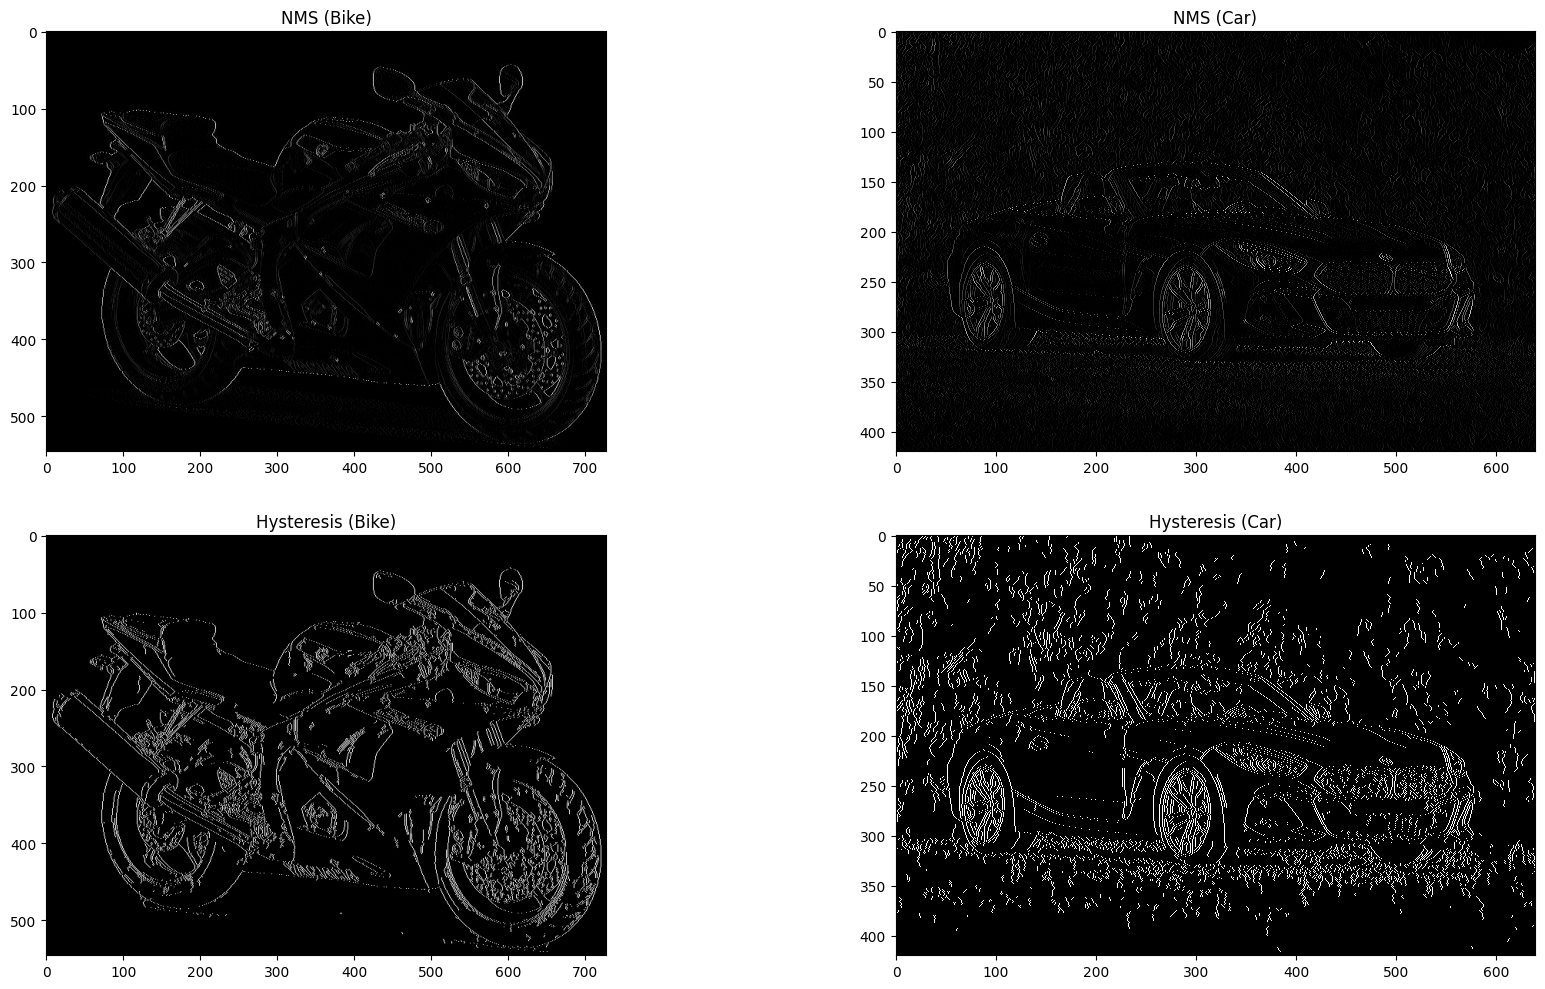

In [ ]:
#visualization of the non-maximum suppression and hysteresis thresholding results for both images
fig, axs = plt.subplots(2, 2, figsize=(18, 10))  #figure size for 2 rows and 2 columns

for i, gray_img in enumerate(imgs):
    fx, fy, grad_mag, grad_dir = sobel(gray_img)  #applying Sobel filter
    nms_output = non_maximum_suppression(grad_mag, grad_dir)  #applying non-maximum suppression
    hysteresis_output = hysteresis_thresholding(nms_output)  #applying hysteresis thresholding
    #column index based on image
    col = 0 if i == 0 else 1
    img_title = 'Bike' if i == 0 else 'Car'
    #non-maximum suppression output plot
    axs[0, col].imshow(nms_output, cmap='gray', aspect='equal')
    axs[0, col].set_title(f'NMS ({img_title})')
    #hysteresis thresholding output plot
    axs[1, col].imshow(hysteresis_output, cmap='gray', aspect='equal')
    axs[1, col].set_title(f'Hysteresis ({img_title})')

#adjusting the layout to avoid overlap and increase space between rows
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.01)
plt.show()